# Univariate imputation for Numerical data
https://www.notion.so/Handling-missing-value-01e3ce468b814980875d2726638ee8e9

## -->fill using pandas

In [1]:
import numpy as mp
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('datasets/titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [5]:
df.isnull().mean()  # % of data missing

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [6]:
x=df.drop(columns=['Survived'])
y=df['Survived']

# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [7]:
x_train.shape, x_test.shape

((712, 3), (179, 3))

In [8]:
x_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [9]:
mean_age = x_train['Age'].mean()
median_age = x_train['Age'].median()

mean_fare = x_train['Fare'].mean()
median_fare = x_train['Fare'].median()
print(mean_age, median_age, mean_fare, median_fare)

29.78590425531915 28.75 32.617596893491076 14.4583


In [10]:
# Now make new col where you fill the missing value with mean
# and other col where you fill the missing value with median

x_train['Age_mean'] = x_train['Age'].fillna(mean_age)
x_train['Age_median'] = x_train['Age'].fillna(median_age)

x_train['Fare_mean'] = x_train['Fare'].fillna(mean_fare)
x_train['Fare_median'] = x_train['Fare'].fillna(median_fare)

In [11]:
x_train.sample(5)

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
748,19.0,53.100,1,19.0,19.0,53.100,53.100
293,24.0,8.850,0,24.0,24.0,8.850,8.850
610,39.0,31.275,6,39.0,39.0,31.275,31.275
632,32.0,30.500,0,32.0,32.0,30.500,30.500
188,40.0,15.500,2,40.0,40.0,15.500,15.500


In [12]:
# When you impute mean values, variance shrinks
# As variance is measure of how far values are form mean
# So make sure there are no drastic changes
print("Actual var of Age: ", x_train['Age'].var())
print("var after mean impute: ", x_train['Age_mean'].var())
print("var after median impute: ", x_train['Age_median'].var())


print("Actual var of fare: ", x_train['Fare'].var())
print("var after mean impute: ", x_train['Fare_mean'].var())
print("var after median impute: ", x_train['Fare_median'].var())


Actual var of Age:  204.3495133904614
var after mean impute:  161.81262452718673
var after median impute:  161.9895663346054
Actual var of fare:  2448.197913706318
var after mean impute:  2324.2385256705547
var after median impute:  2340.0910219753637


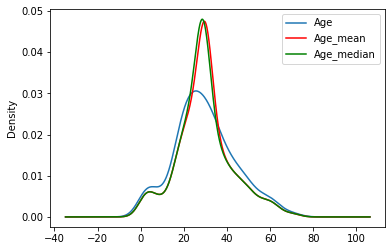

In [13]:
# change in disrtibution of age
fig = plt.figure()
ax=fig.add_subplot(111)

# og variable distribution
x_train['Age'].plot(kind='kde', ax=ax)
x_train['Age_mean'].plot(kind='kde', ax=ax, color='red')
x_train['Age_median'].plot(kind='kde', ax=ax, color='green')

lines, labels=ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

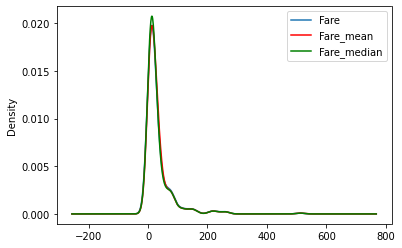

In [14]:
# change in disrtibution of fare
fig = plt.figure()
ax=fig.add_subplot(111)

# og variable distribution
x_train['Fare'].plot(kind='kde', ax=ax)
x_train['Fare_mean'].plot(kind='kde', ax=ax, color='red')
x_train['Fare_median'].plot(kind='kde', ax=ax, color='green')

lines, labels=ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [15]:
x_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,66.665205,64.858859
Fare,70.719262,2448.197914,17.258917,55.603719,57.957599,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.146106,-5.112563,16.385048,16.476305
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,52.788341,51.358000
Age_median,204.349513,57.957599,-5.112563,161.812625,161.989566,55.023037,53.553455
Fare_mean,66.665205,2448.197914,16.385048,52.788341,55.023037,2324.238526,2324.238526
Fare_median,64.858859,2448.197914,16.476305,51.358000,53.553455,2324.238526,2340.091022


In [16]:
x_train.corr()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.090156,0.087356
Fare,0.092644,1.000000,0.208268,0.088069,0.091757,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.244610,-0.242883,0.205499,0.205942
Age_mean,1.000000,0.088069,-0.244610,1.000000,0.999454,0.086078,0.083461
Age_median,1.000000,0.091757,-0.242883,0.999454,1.000000,0.089673,0.086982
Fare_mean,0.090156,1.000000,0.205499,0.086078,0.089673,1.000000,0.996607
Fare_median,0.087356,1.000000,0.205942,0.083461,0.086982,0.996607,1.000000


<Axes: >

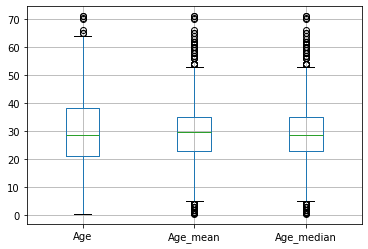

In [17]:
x_train[['Age', 'Age_mean', 'Age_median']].boxplot()

<Axes: >

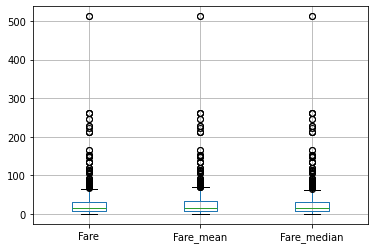

In [18]:
x_train[['Fare', 'Fare_mean', 'Fare_median']].boxplot()

# -->Fill using sklean
using sklearn simple imputer
https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [20]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [21]:
# impute mean to Age col and median or fare col
trf = ColumnTransformer([
    ('imputer1', imputer1, ['Age']),
    ('imputer2', imputer2, ['Fare'])
    
], remainder='passthrough')

In [22]:
trf.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [23]:
trf.named_transformers_['imputer1'].statistics_  #gives mean of age

array([28.75])

In [24]:
trf.named_transformers_['imputer2'].statistics_  #gives median of Fare

array([32.61759689])

In [25]:
x_train = trf.transform(x_train)
x_test = trf.transform(x_test)

In [26]:
x_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])

# filling arbitary values

In [29]:
x_train['Age_99'] = x_train["Age"].fillna(99)
x_train['Age_minus'] = x_train['Age'].fillna(-1)

x_train['Fare_99'] = x_train['Fare'].fillna(99)
x_train['Fare_minus'] = x_train['Fare'].fillna(-1)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices